# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from tensorflow.keras.datasets import cifar100
import numpy as np
np.random.seed(100)

In [2]:
(x_train , y_train) , (x_test , y_test) = cifar100.load_data()
print(x_train.shape)
print(y_train.shape)

169009152/169001437 [==============================] - 26s 0us/step
(50000, 32, 32, 3)
(50000, 1)


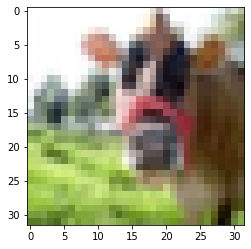

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [23]:
def pic_look(label):
    pic_num = [i for i in range(0 , label.max())]
    x_num = []
    y_num = []
    for x , num in enumerate(label):
        if num[0] in pic_num:
            x_num.append(x)
            y_num.append(num[0])
            pic_num.remove(num[0])
        if len(pic_num) == 0:
            break
    print(len(x_num))
    return x_num , y_num

In [24]:
x_num , y_num = pic_look(y_train)

99


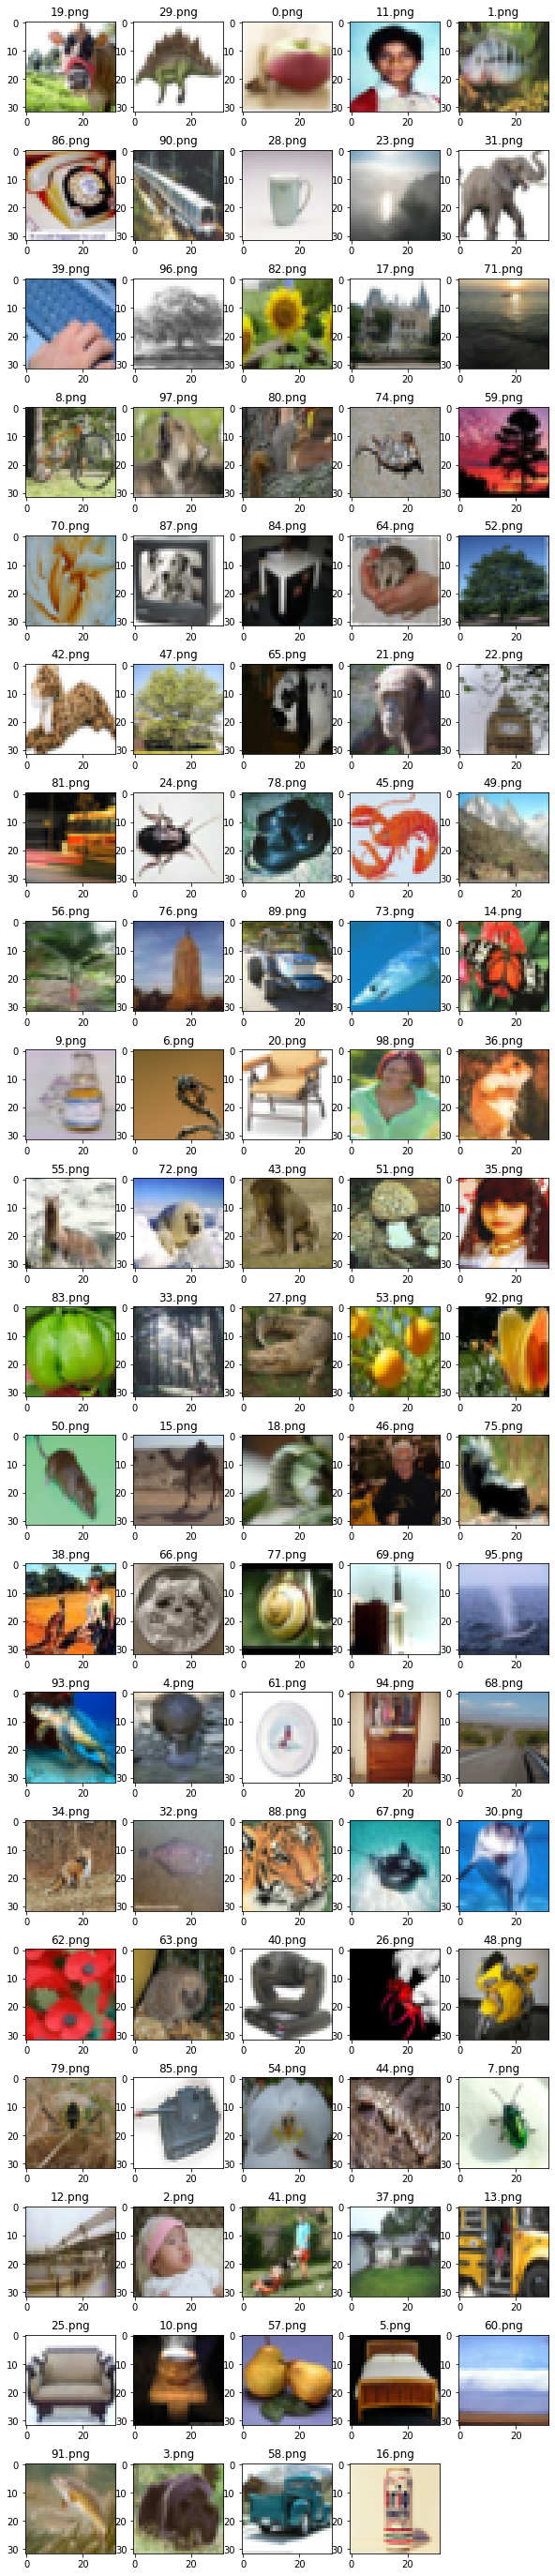

In [26]:
plt.figure(figsize=(10,50))
for i , (x , y) in enumerate(zip(x_num , y_num)):
    plt.subplot(20,5,i+1)
    plt.imshow(x_train[x])
    plt.title(f'{y}.png')
plt.show()

# 資料準備

# Image normalize 

In [30]:
x_train_nomzie = x_train / 255.0
x_test_nomzie = x_test / 255.0
x_train_nomzie[0][0]

array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 0.98823529, 0.97254902],
       [0.90588235, 0.87058824, 0.83529412],
       [0.69019608, 0.65882353, 0.63921569],
       [0.92941176, 0.9254902 , 0.92156863],
       [1.        , 1.        , 1.        ],
       [1.

# 轉換label 為OneHot Encoding

In [31]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train)
y_test_onehot = utils.to_categorical(y_test)
y_train_onehot.shape

(50000, 100)